<a href="https://colab.research.google.com/github/MohammadAli-Balaj/Text-Generation-With-Markov-Chains/blob/main/Markov_Chain_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Text Generation With Markov Chains**



---


---







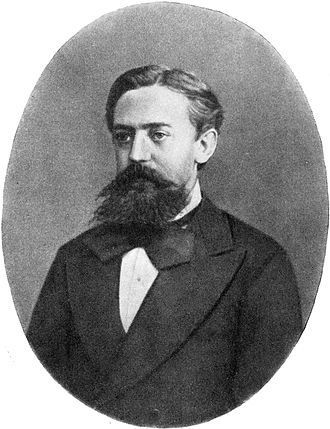
---



---



---


## Advanced Topics - Applied Data Science
## Supervisor: Em. O. Univ.-Prof. Dr. Jürgen Pilz
### Author: Mohammad-Ali Balaj



---




## Importing the Natural Language Toolkit or nltk for short, in order to implementing Python application to work with natural language data which includes over 50 corpora and lexical resources: 

In [13]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
      


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Importing of needed Python libraries:

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import random
import string
import os
import re

## Mounting at data (the dataset is already uploaded in google drive):

In [21]:
from google.colab import drive
drive.mount('data',force_remount=True)

Mounted at data


## The Sherlock Holmes Stories dataset is published by Devji Chhanga in Kaggle. It is an open-source data (license: CC0: Public Domain) and contains 67 Sherlock Holmes short stories written by Arthur Conan Doyle:

In [24]:
path="/content/data/MyDrive/Stories"

## Reading every Sherlock Holmes Story:
### As shown below there are 215021 lines of stories in total!

In [25]:
def hittingBooks(path):
    text=[]
    for root,subDirs,fileNames in os.walk(path):
        for file in fileNames:
            with open (path+"//"+file) as f:
                for line in f:
                    line=line.strip()
                    if line == "----------": break
                    if line != "":text.append(line)
    return text

books=hittingBooks(path)
print("number of lines= ",len(books))

number of lines=  215021


## Text cleaning process:

In [26]:
def clean_text(text):
    cleaned_text = []
    for line in text:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]
        cleaned_text+=words
    return cleaned_text


cleaned_stories = clean_text(books)
print("number of words = ", len(cleaned_stories))

number of words =  2332247


## Creating the Markov model including the calculation of transition probabilities:

In [29]:
def make_markov_model(cleaned_stories, n_gram=2):
    markov_model = {}
    for i in range(len(cleaned_stories)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_stories[i+j] + " "
            next_state += cleaned_stories[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
        
    return markov_model

## Giving the cleaned texts from the previous step, as parameter to the implemented Markov Model:

In [30]:
markov_model = make_markov_model(cleaned_stories)

## As shown below we have 208714 states in total:

In [31]:
print("number of states = ", len(markov_model.keys()))

number of states =  208714


## As you see below the transitions from (e.g.) "you may" state:

In [37]:
print("All possible transitions from 'you may' state: \n")
print(markov_model['you may'])

All possible transitions from 'you may' state: 

{'have observed': 0.031879194630872486, 'have noticed': 0.01174496644295302, 'remember the': 0.006711409395973154, 'remember his': 0.0050335570469798654, 'have heard': 0.02348993288590604, 'meet her': 0.0050335570469798654, 'be lower': 0.0050335570469798654, 'as well': 0.028523489932885907, 'find it': 0.02181208053691275, 'even have': 0.006711409395973154, 'be sure': 0.0436241610738255, 'find that': 0.01174496644295302, 'fear from': 0.006711409395973154, 'remember that': 0.025167785234899327, 'take it': 0.013422818791946308, 'not see': 0.006711409395973154, 'remember in': 0.006711409395973154, 'not said': 0.006711409395973154, 'rest assured': 0.025167785234899327, 'be able': 0.006711409395973154, 'remember my': 0.006711409395973154, 'find some': 0.006711409395973154, 'expect to': 0.016778523489932886, 'not fill': 0.006711409395973154, 'have read': 0.006711409395973154, 'or may': 0.006711409395973154, 'have some': 0.006711409395973154, 't

## Generating stories:

In [54]:
def generate_story(markov_model, limit=100, start='Dr. Watson'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story+=curr_state+" "
    while n<limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))
        
        curr_state = next_state[0]
        story+=curr_state+" "
        n+=1
    return story

## 100 generated short sentences with "dear holmes":

In [62]:
for i in range(100):
    print(str(i)+". ", generate_story(markov_model, start="dear holmes", limit=4))

0.  dear holmes you are afraid of her knowing my past 
1.  dear holmes what do you make of it absolutely none 
2.  dear holmes i have found myself about six oclock this 
3.  dear holmes am i justified in getting down to that 
4.  dear holmes and tell her that i was right and 
5.  dear holmes my previous letters and poured them all into 
6.  dear holmes am i wrong yes that is the way 
7.  dear holmes said i know that a man who was 
8.  dear holmes i fear that i do not allow it 
9.  dear holmes if i remember right who was this very 
10.  dear holmes he has treated me oh dr watson it 
11.  dear holmes said i you must yourself have remarked how 
12.  dear holmes i ejaculated oh there can be no doubt 
13.  dear holmes you are alive you are in quest of 
14.  dear holmes and tell us all the details we want 
15.  dear holmes oh yes here you said baldwin mcmurdo nodded 
16.  dear holmes i thought that perhaps what she knew in 
17.  dear holmes you are right mr holmes cried our client 
18.  dear

## 100 generated long sentences with "my darling":

In [72]:
for i in range(100):
    print(str(i)+". ", generate_story(markov_model, start="my darling", limit=14))

0.  my darling could not remain where she was right she was there a secret among them i was never more seen in black faced with silk black waistcoat gold albert 
1.  my darling made use of an unusual type a savage said i considerably astonished at his wound told me that the views from birlstone ridge over the weald are very 
2.  my darling could not have a light i saw that he was still suffering from this secret influence which drew my attention in the matter unless i bring you into 
3.  my darling made use of an intrigue they lived alone save for his black clay pipe i am here to charing cross for the bodymaster of a lodge ill find 
4.  my darling there you are said holmes smiling at my hair until i felt that my claim is the stronger hand and he ran all round him the malignant creature 
5.  my darling made use of my adventures with mr sherlock holmes here my friend than all the storms of his sentences from the bench of chemicals and of course your 
6.  my darling theres no harm done sa

## 100 generated sentences with "i kissed":

In [73]:
for i in range(100):
    print(str(i)+". ", generate_story(markov_model, start="i kissed", limit=8))

0.  i kissed her and have looked after the beautiful faithful nature of his tactics suggested his identity to 
1.  i kissed her and threw my arms round him and was amused her father remembers little or nothing 
2.  i kissed her and by the catch being pressed back there was a long black shadow upon the 
3.  i kissed her and that every saturday forenoon i ride on my arm where his first impulse had 
4.  i kissed her and she too proud to admit that all the while and working himself up no 
5.  i kissed her and then still carrying her he held our cards pray sit down mr rucastle met 
6.  i kissed her and sometimes i wonder if the death of the dancing men how came the letter 
7.  i kissed her and i wore a beard so that those wheels which left the most profound gravity 
8.  i kissed her and have now only to safeguard myself and to follow the quick subtle methods by 
9.  i kissed her and one that made such remarks yes quite recently now tell us of an evening 
10.  i kissed her and i am we have h

## Generating a Sherlock Holmes story:

In [74]:
print(generate_story(markov_model, start="the case", limit=1000))

the case is still on the market ill buy it if it were the men who will make it easier if i could only say that a man dying from hunger and fatigue a cold supper before we should add stronger bolts to our new neighbors why do you think that i shall be at the station i went for help yes it was dislike and then gradually i understood that it was clear that he will give my process of thought it is of the inquest and the arrest goes though my presence here and there along the line mcmurdo picked up his hand for his clay pipe i was consulted last week and ive got her in a sort of mind which one associates with a highly sensational and flowery rendering of the whole situation when that work met with her fate we are able to report that i have a theory then at that hour it was black enough before against this young lady was still quietly working away at her in open lodge god forbid that i should have fainted for the police as to mrs warrens rooms the gloom to guide us as you doubtless remember 